## 測試資料

In [1]:
import sklearn
import seaborn as sb

iris = sb.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## linear regression

In [3]:
from sklearn.linear_model import LinearRegression

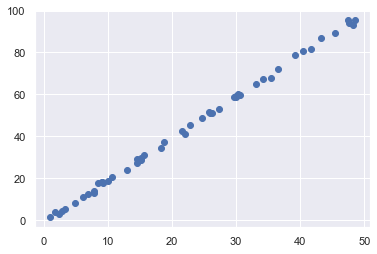

In [4]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) #建立隨機線性測試資料
x = 50*rng.rand(50)
y = 2*x-1+rng.randn(50)
plt.scatter(x,y)

In [5]:
model = LinearRegression(fit_intercept = True)
X = x[:, np.newaxis]
model.fit(X,y)

LinearRegression()

In [9]:
xfit = np.linspace(-1, 51)
xfit

array([-1.        ,  0.06122449,  1.12244898,  2.18367347,  3.24489796,
        4.30612245,  5.36734694,  6.42857143,  7.48979592,  8.55102041,
        9.6122449 , 10.67346939, 11.73469388, 12.79591837, 13.85714286,
       14.91836735, 15.97959184, 17.04081633, 18.10204082, 19.16326531,
       20.2244898 , 21.28571429, 22.34693878, 23.40816327, 24.46938776,
       25.53061224, 26.59183673, 27.65306122, 28.71428571, 29.7755102 ,
       30.83673469, 31.89795918, 32.95918367, 34.02040816, 35.08163265,
       36.14285714, 37.20408163, 38.26530612, 39.32653061, 40.3877551 ,
       41.44897959, 42.51020408, 43.57142857, 44.63265306, 45.69387755,
       46.75510204, 47.81632653, 48.87755102, 49.93877551, 51.        ])

In [34]:
Xfit = xfit[:, np.newaxis]  #model predict 測試資料集的 shape (sample數量, feature數量）
yfit = model.predict(Xfit)
Xfit.shape

(50, 1)

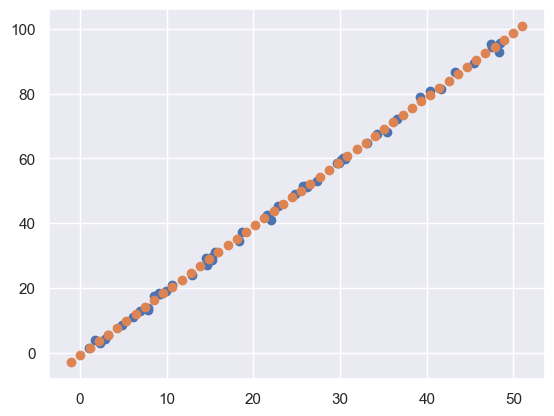

In [28]:
plt.scatter(x,y)
plt.scatter(xfit, yfit)

## one-hot encoding

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [8]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=True, dtype=int)
s = vec.fit_transform(data)

## 分類特徵 文字

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

sample = ["Paragraphs are the building blocks of papers. Many students define paragraphs in terms of length: a paragraph is a group of at least five sentences, a paragraph is half a page long, etc. In reality, though, the unity and coherence of ideas among sentences is what constitutes a paragraph. A paragraph is defined as “a group of sentences or a single sentence that forms a unit” (Lunsford and Connors 116). Length and appearance do not determine whether a section in a paper is a paragraph. For instance, in some styles of writing, particularly journalistic styles, a paragraph can be just one sentence long. Ultimately, a paragraph is a sentence or group of sentences that support one main idea. In this handout, we will refer to this as the “controlling idea,” because it controls what happens in the rest of the paragraph."]
vec = CountVectorizer()
X = vec.fit_transform(sample)

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

/Users/benjaminhsu/opt/anaconda3/envs/AI/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,116,among,and,appearance,are,as,at,be,because,blocks,...,though,to,ultimately,unit,unity,we,what,whether,will,writing
0,1,1,3,1,1,2,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1


## naive bayes classification

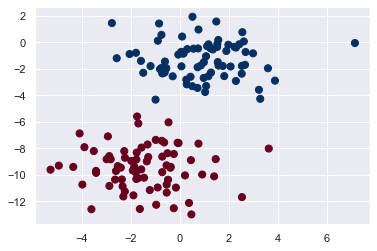

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y= make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [16]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

In [17]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000,2)
yNew = model.predict(Xnew)

(-5.890554373486014, 7.777566725032841, -13.742897406740827, 2.669482242830803)

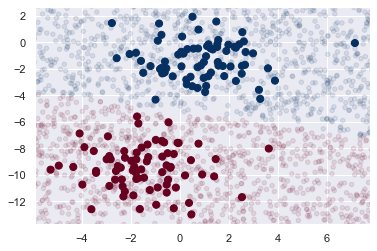

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=yNew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim)